This code has part of the paper entitled: "A Data-Driven Approach to Predicting Electric Load Profiles in a Quicklime Company"

In [1]:
import pandas as pd


df = pd.read_csv('dataset_limpio_carga_laboral.csv')

# Mostrar el DataFrame
print(df.head())

   perfil_carga  global_active_power  global_reactive_power     voltage  \
0           0.0                  0.0                    0.0  220.537667   
1           0.0                  0.0                    0.0  218.650113   
2           0.0                  0.0                    0.0  220.671497   
3           0.0                  0.0                    0.0  220.888396   
4           0.0                  0.0                    0.0  219.897758   

   global_intensity  Year  Month  Day  Hour  Minute  
0               0.0  2023      1    1     0       0  
1               0.0  2023      1    1     0      10  
2               0.0  2023      1    1     0      20  
3               0.0  2023      1    1     0      30  
4               0.0  2023      1    1     0      40  


In [2]:
print(df.head())

   perfil_carga  global_active_power  global_reactive_power     voltage  \
0           0.0                  0.0                    0.0  220.537667   
1           0.0                  0.0                    0.0  218.650113   
2           0.0                  0.0                    0.0  220.671497   
3           0.0                  0.0                    0.0  220.888396   
4           0.0                  0.0                    0.0  219.897758   

   global_intensity  Year  Month  Day  Hour  Minute  
0               0.0  2023      1    1     0       0  
1               0.0  2023      1    1     0      10  
2               0.0  2023      1    1     0      20  
3               0.0  2023      1    1     0      30  
4               0.0  2023      1    1     0      40  


In [3]:
df

,perfil_carga,global_active_power,global_reactive_power,voltage,global_intensity,Year,Month,Day,Hour,Minute
0,0.0,0.0,0.0,220.537667,0.0,2023,1,1,0,0
1,0.0,0.0,0.0,218.650113,0.0,2023,1,1,0,10
2,0.0,0.0,0.0,220.671497,0.0,2023,1,1,0,20
3,0.0,0.0,0.0,220.888396,0.0,2023,1,1,0,30
4,0.0,0.0,0.0,219.897758,0.0,2023,1,1,0,40
...,...,...,...,...,...,...,...,...,...,...
52555,0.0,0.0,0.0,219.747224,0.0,2023,12,31,23,10
52556,0.0,0.0,0.0,217.300853,0.0,2023,12,31,23,20
52557,0.0,0.0,0.0,220.549853,0.0,2023,12,31,23,30
52558,0.0,0.0,0.0,220.566343,0.0,2023,12,31,23,40


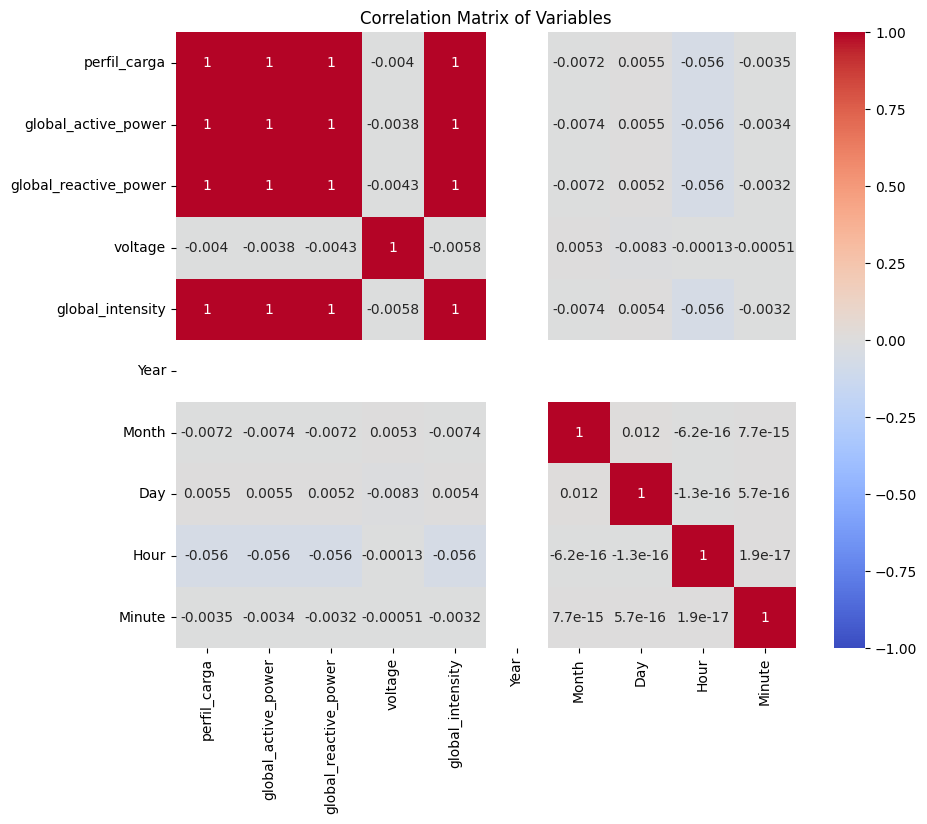

In [4]:
# Importar bibliotecas necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Calcular la matriz de correlación
corr_matrix = df.corr()

# Crear la gráfica del mapa de calor (heatmap) con seaborn
plt.figure(figsize=(10, 8))  # Ajustar el tamaño de la figura
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)

# Agregar título a la gráfica
plt.title("Correlation Matrix of Variables")


# Guardar la gráfica en un archivo PDF
plt.savefig("correlation_matrix.pdf", format="pdf", bbox_inches="tight")

# Mostrar la gráfica
plt.show()


##Arimax Model

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


RMSE: 392.9646536128175


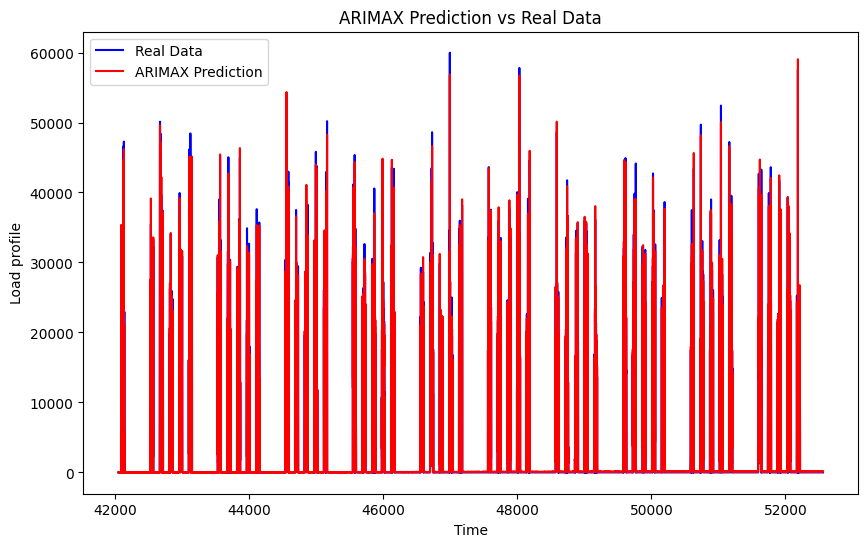

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Supongamos que 'df' es tu DataFrame con los datos

# Separar las características exógenas y la variable objetivo
X_exog = df.drop('perfil_carga', axis=1)  # Variables exógenas
y = df['perfil_carga']  # Variable objetivo (perfil_carga)

# División basada en el tiempo (80% entrenamiento, 20% prueba)
train_size = int(len(y) * 0.8)
X_train_exog, X_test_exog = X_exog[:train_size], X_exog[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Ajustar el modelo ARIMAX en los datos de entrenamiento
# order=(p,d,q) se puede ajustar según los datos, aquí es un ejemplo con (5,1,0)
model = ARIMA(y_train, order=(5, 1, 0), exog=X_train_exog)
model_fit = model.fit()

# Hacer predicciones sobre los datos de prueba, con las variables exógenas
start = len(y_train)
end = len(y_train) + len(y_test) - 1
predictions = model_fit.predict(start=start, end=end, exog=X_test_exog, typ='levels')

# Calcular el RMSE entre los valores reales y las predicciones
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'RMSE: {rmse}')

# Graficar el perfil de carga real vs predicho
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Real Data', color='blue')
plt.plot(y_test.index, predictions, label='ARIMAX Prediction', color='red')
plt.title('ARIMAX Prediction vs Real Data')
plt.xlabel('Time')
plt.ylabel('Load profile')
plt.legend()

# Guardar la gráfica en un archivo PDF
plt.savefig("arimax_all.pdf", format="pdf", bbox_inches="tight")
plt.show()


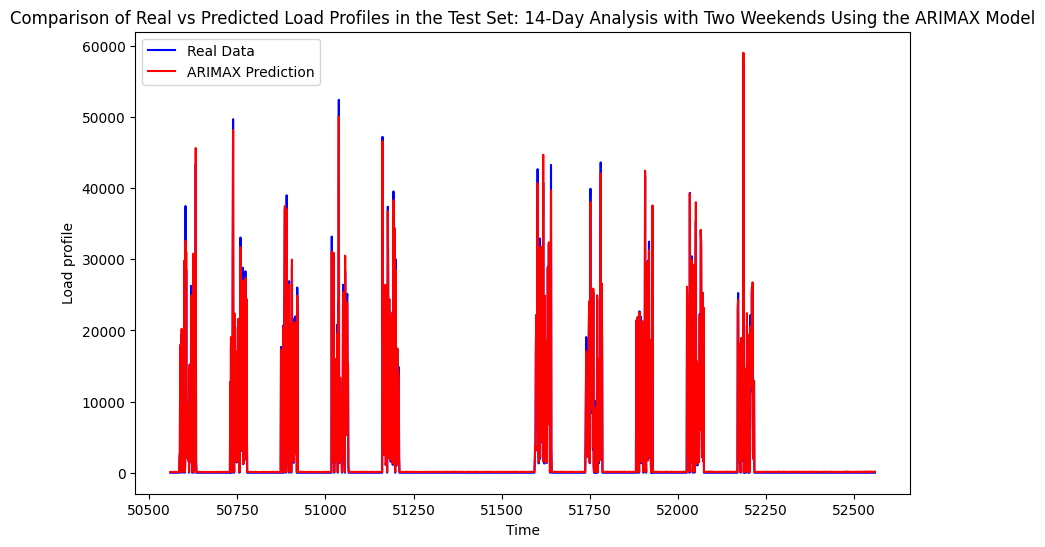

In [6]:
# Graficar los últimos 2000 puntos de los valores reales vs predichos
plt.figure(figsize=(10, 6))
plt.plot(y_test.index[-2000:], y_test.values[-2000:], label='Real Data', color='blue')
plt.plot(y_test.index[-2000:], predictions[-2000:], label='ARIMAX Prediction', color='red')
plt.title('Comparison of Real vs Predicted Load Profiles in the Test Set: 14-Day Analysis with Two Weekends Using the ARIMAX Model')
plt.xlabel('Time')
plt.ylabel('Load profile')
plt.legend()
# Guardar la gráfica en un archivo PDF
plt.savefig("ARIMAX_14days.pdf", format="pdf", bbox_inches="tight")

plt.show()

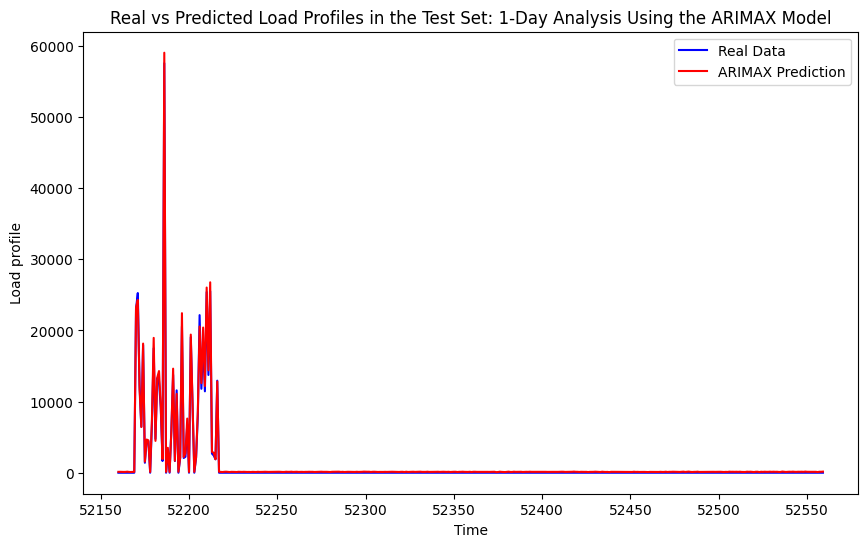

In [7]:
def plot_last_n_points(n=2000):
    """
    Función para graficar los últimos n puntos de los valores reales vs predichos.

    :param n: Número de puntos a graficar. Valor por defecto: 2000.
    """
    # Graficar los últimos n puntos de los valores reales vs predichos
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.index[-n:], y_test.values[-n:], label='Real Data', color='blue')
    plt.plot(y_test.index[-n:], predictions[-n:], label='ARIMAX Prediction', color='red')
    plt.title('Real vs Predicted Load Profiles in the Test Set: 1-Day Analysis Using the ARIMAX Model')
    plt.xlabel('Time')
    plt.ylabel('Load profile')
    plt.legend()
    plt.savefig("arimax_1_DAY.pdf", format="pdf", bbox_inches="tight")
    plt.show()

# Llamar a la función con n=2000 o cualquier otro valor que desees
plot_last_n_points(n=400)

##  LSTM Model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1314/1314 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0015 - val_loss: 5.0616e-05
Epoch 2/20
1314/1314 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 8.6652e-05 - val_loss: 5.9346e-05
Epoch 3/20
1314/1314 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 7.7904e-05 - val_loss: 6.0098e-05
Epoch 4/20
1314/1314 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 7.1514e-05 - val_loss: 5.0620e-05
Epoch 5/20
1314/1314 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 6.8866e-05 - val_loss: 7.2178e-05
Epoch 6/20
1314/1314 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 6.9923e-05 - val_loss: 4.8991e-05
Epoch 7/20
1314/1314 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 6.4308e-05 - val_loss: 5.2579e-05
Epoch 8/20
1314/1314 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 6.4540e-05 - val_loss: 7.5513e-05
Epoch 9/20
1314/1314 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 6.4832e-05 - val_loss: 9.9684e-05
Epoch 10/20
1314/1314 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 6.2698e-05 - val_loss: 5.7568e-05
Epoch 11/20
1314/1314 ━━━━━━━━━━━━━━━━━━━━ 

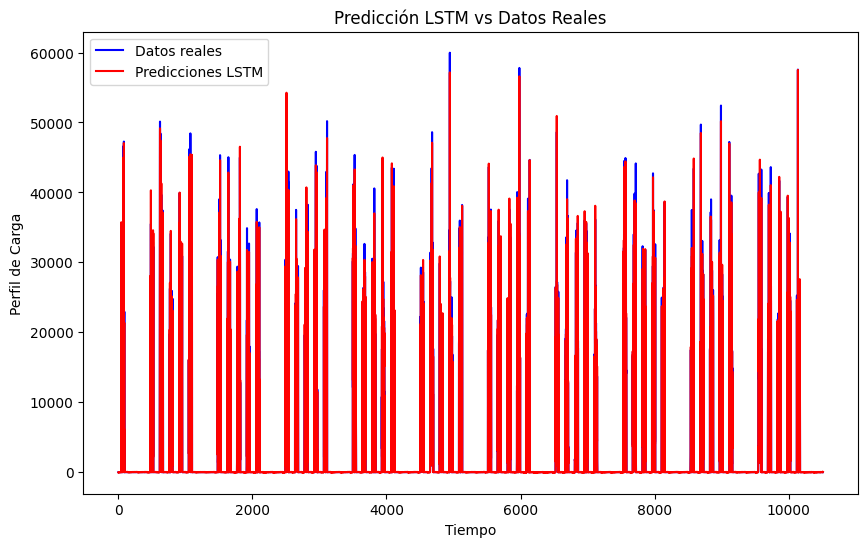

In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Supongamos que 'df' es tu DataFrame con los datos

# Separar las características exógenas y la variable objetivo
X_exog = df.drop('perfil_carga', axis=1)  # Variables exógenas
y = df['perfil_carga']  # Variable objetivo (perfil_carga)

# Escalado de datos (opcional pero recomendado para LSTM)
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_exog_scaled = scaler_X.fit_transform(X_exog)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# División basada en el tiempo (80% entrenamiento, 20% prueba)
train_size = int(len(y_scaled) * 0.8)
X_train_exog, X_test_exog = X_exog_scaled[:train_size], X_exog_scaled[train_size:]
y_train, y_test = y_scaled[:train_size], y_scaled[train_size:]

# Redimensionar los datos para LSTM (samples, time steps, features)
# Aquí vamos a suponer que los datos de entrada no tienen pasos de tiempo, es decir, un solo paso temporal por muestra
X_train_exog = X_train_exog.reshape((X_train_exog.shape[0], 1, X_train_exog.shape[1]))
X_test_exog = X_test_exog.reshape((X_test_exog.shape[0], 1, X_test_exog.shape[1]))

# Construcción del modelo LSTM
model = tf.keras.Sequential()

# Añadimos una capa LSTM
model.add(tf.keras.layers.LSTM(units=150, activation='tanh', return_sequences=False, input_shape=(X_train_exog.shape[1], X_train_exog.shape[2])))

# Capa densa para la salida
model.add(tf.keras.layers.Dense(1))

# Compilar el modelo
model.compile(optimizer='rmsprop', loss='mean_squared_error')

# Entrenamiento del modelo
history = model.fit(X_train_exog, y_train, epochs=20, batch_size=32, validation_data=(X_test_exog, y_test))

# Predicciones en el conjunto de prueba
y_pred_scaled = model.predict(X_test_exog)

# Desescalar las predicciones
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test = scaler_y.inverse_transform(y_test)

# Calcular el RMSE entre los valores reales y las predicciones
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

# Graficar el perfil de carga real vs predicho
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Datos reales', color='blue')
plt.plot(y_pred, label='Predicciones LSTM', color='red')
plt.title('Predicción LSTM vs Datos Reales')
plt.xlabel('Tiempo')
plt.ylabel('Perfil de Carga')
plt.legend()
plt.show()


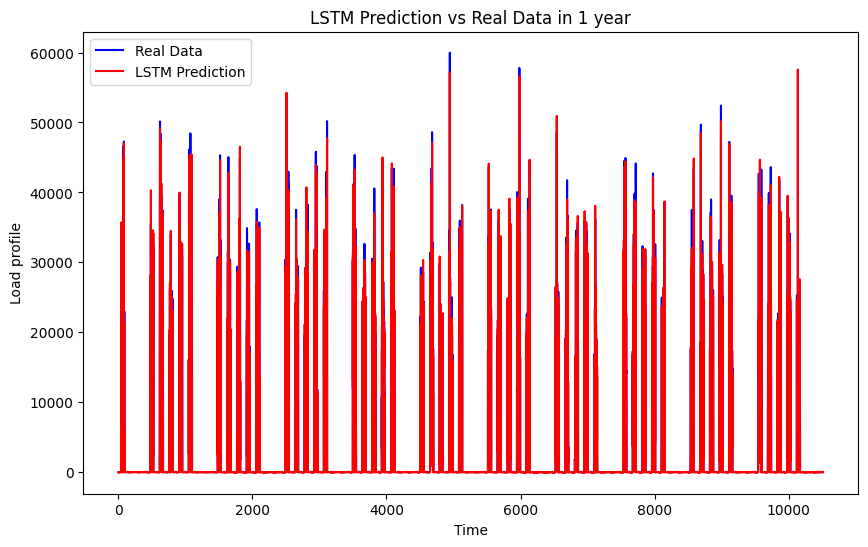

In [9]:
# Graficar el perfil de carga real vs predicho
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Real Data', color='blue')
plt.plot(y_pred, label='LSTM Prediction', color='red')
plt.title('LSTM Prediction vs Real Data in 1 year')
plt.xlabel('Time')
plt.ylabel('Load profile')
plt.legend()
plt.savefig("lstm_year_all.pdf", format="pdf", bbox_inches="tight")
plt.show()

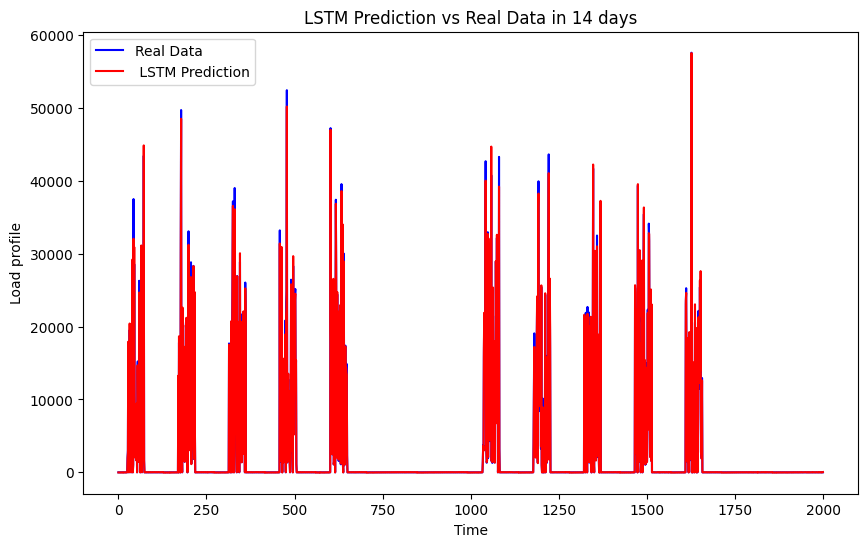

In [12]:
def plot_last_n_points(y_test, y_pred, n=2000):
    """
    Función para graficar los últimos n puntos de los valores reales vs predichos.

    :param y_test: Valores reales.
    :param y_pred: Predicciones del modelo.
    :param n: Número de puntos a graficar. Valor por defecto: 2000.
    """
    # Graficar los últimos n puntos de los valores reales vs predichos
    plt.figure(figsize=(10, 6))
    plt.plot(y_test[-n:], label='Real Data', color='blue')
    plt.plot(y_pred[-n:], label=' LSTM Prediction', color='red')
    plt.title('LSTM Prediction vs Real Data in 14 days')
    plt.xlabel('Time')
    plt.ylabel('Load profile')
    plt.legend()
    plt.savefig("lstm_1_day.pdf", format="pdf", bbox_inches="tight")
    plt.show()

# Llamar a la función con n=2000 o cualquier otro valor que desees
plot_last_n_points(y_test, y_pred, n=2000)

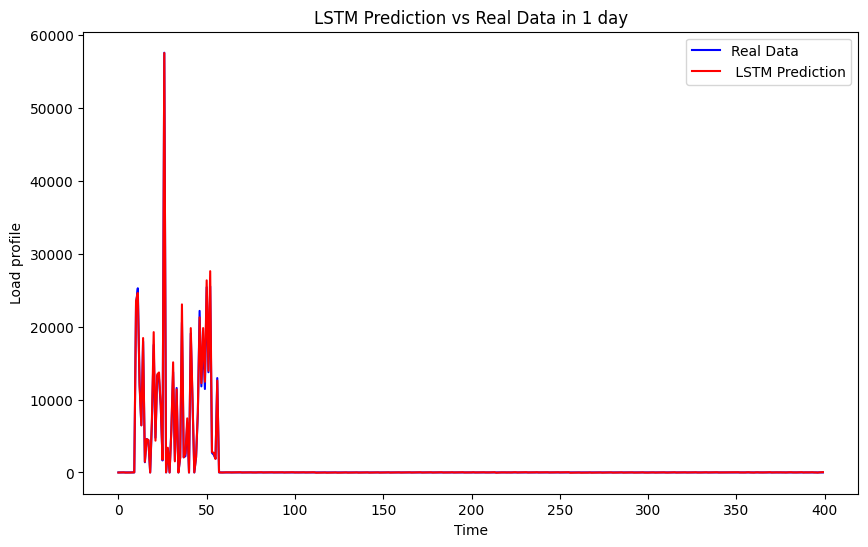

In [11]:
plot_last_n_points(y_test, y_pred, n=400)